In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\SUDIP\OneDrive\Desktop\Mahinda sels analysis\chasis number SEP 2024.xlsx")
df.head()

,SL NO.,SALESMAN NAME,CUSTOMER NAME,FATHER NAME,VILLAGE,TEHSIL,MODEL,TRACTOR SR.NO,DATE OF DELIVERY,YEAR
0,132,SOUMEN DAS,PURNA CHANDRA BAG,NABAKANTA BAG,Turkakashba,Dantan - II,YUVO TECH + 585DI,MBNPFANVPPND00662,31/01/2024,2024
1,133,SANJAY BISWAS,PITAM MAJI,SUNIL MAJI,Ramkrishnapur,Daspur - II,YUVO TECH + 585DI,MBNPFANVPPNE00752,20/01/2024,2024
2,134,SK SISH MAHAMMAD,SK HOQUE,SK ABU KALAM,Mamudpur,Keshpur,YUVO TECH + 585DI,MBNPFANVPPNE00753,23/02/2024,2024
3,135,NISHAN DAS,RABINDRANATH ASH,GOPAL CHANDRA ASH,Peruabad,Garbeta - II,YUVO TECH + 575DI,MBNPFALDPRNK01845,15/02/2024,2024
4,136,SUKDEV BHUNIA,MANAS RANJAN BHUNIA,GOUR HARI BHUNIA,Barada,Sabang,OJA 3140,MBNMJNSJFPZG00065,12/04/2024,2024


In [2]:
null_values = df.isnull().sum()
print(null_values)

SL NO.                0
SALESMAN NAME         0
CUSTOMER NAME       228
FATHER NAME         577
VILLAGE             581
TEHSIL              581
MODEL                 0
TRACTOR SR.NO         0
DATE OF DELIVERY      0
YEAR                  0
dtype: int64


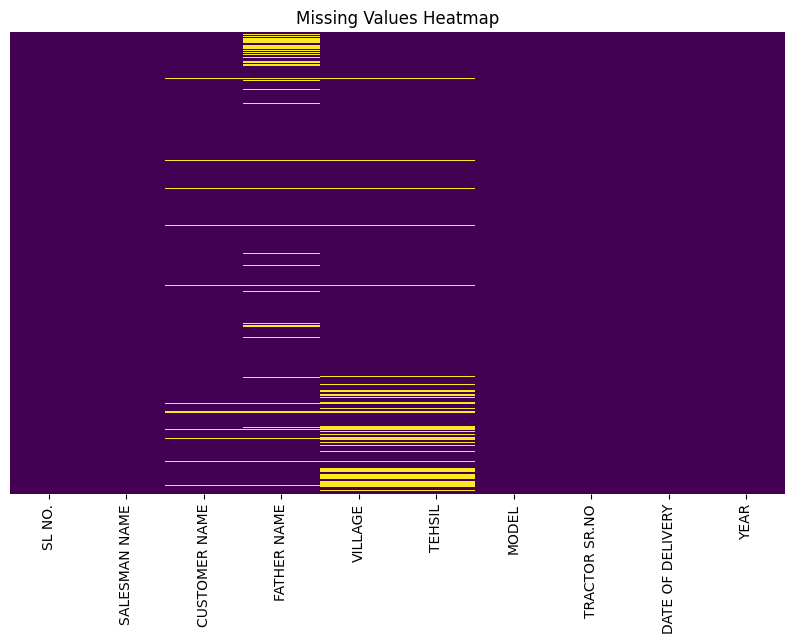

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [4]:
df['TEHSIL'] = df['TEHSIL'].fillna('Unknown')
print(df.head())

   SL NO.     SALESMAN NAME         CUSTOMER NAME        FATHER NAME  \
0     132        SOUMEN DAS    PURNA  CHANDRA BAG      NABAKANTA BAG   
1     133     SANJAY BISWAS          PITAM   MAJI         SUNIL MAJI   
2     134  SK SISH MAHAMMAD              SK HOQUE       SK ABU KALAM   
3     135        NISHAN DAS      RABINDRANATH ASH  GOPAL CHANDRA ASH   
4     136     SUKDEV BHUNIA  MANAS  RANJAN BHUNIA   GOUR HARI BHUNIA   

         VILLAGE        TEHSIL              MODEL      TRACTOR SR.NO  \
0    Turkakashba   Dantan - II  YUVO TECH + 585DI  MBNPFANVPPND00662   
1  Ramkrishnapur   Daspur - II  YUVO TECH + 585DI  MBNPFANVPPNE00752   
2       Mamudpur       Keshpur  YUVO TECH + 585DI  MBNPFANVPPNE00753   
3       Peruabad  Garbeta - II  YUVO TECH + 575DI  MBNPFALDPRNK01845   
4         Barada        Sabang           OJA 3140  MBNMJNSJFPZG00065   

  DATE OF DELIVERY  YEAR  
0       31/01/2024  2024  
1       20/01/2024  2024  
2       23/02/2024  2024  
3       15/02/2024  2024  

C:\Users\SUDIP\AppData\Local\Temp\ipykernel_12504\3572794701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette="viridis")


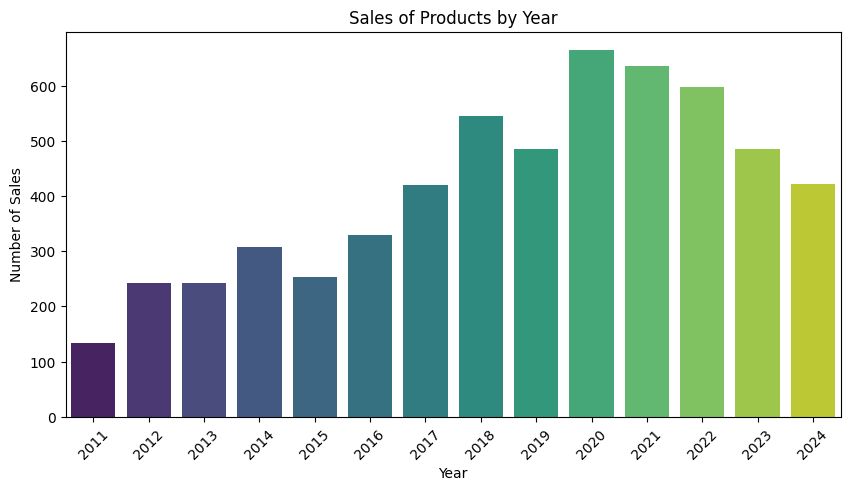

In [5]:
sales_by_year = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette="viridis")

plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.title("Sales of Products by Year")
plt.xticks(rotation=45)
plt.show()

In [6]:
df['DATE OF DELIVERY'] = pd.to_datetime(df['DATE OF DELIVERY'], dayfirst=True)

df['Year'] = df['DATE OF DELIVERY'].dt.year
df['Month'] = df['DATE OF DELIVERY'].dt.month

In [7]:
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales')

highest_sales_per_year = monthly_sales.loc[monthly_sales.groupby('Year')['Sales'].idxmax()]

print(highest_sales_per_year)

     Year  Month  Sales
5    2011      9     27
19   2012     11     34
26   2013      6     34
42   2014     10     42
47   2015      3     32
62   2016      6     51
74   2017      6     79
86   2018      6    110
98   2019      6     65
111  2020      7    111
122  2021      6    142
134  2022      6    118
146  2023      6     86
158  2024      6    109


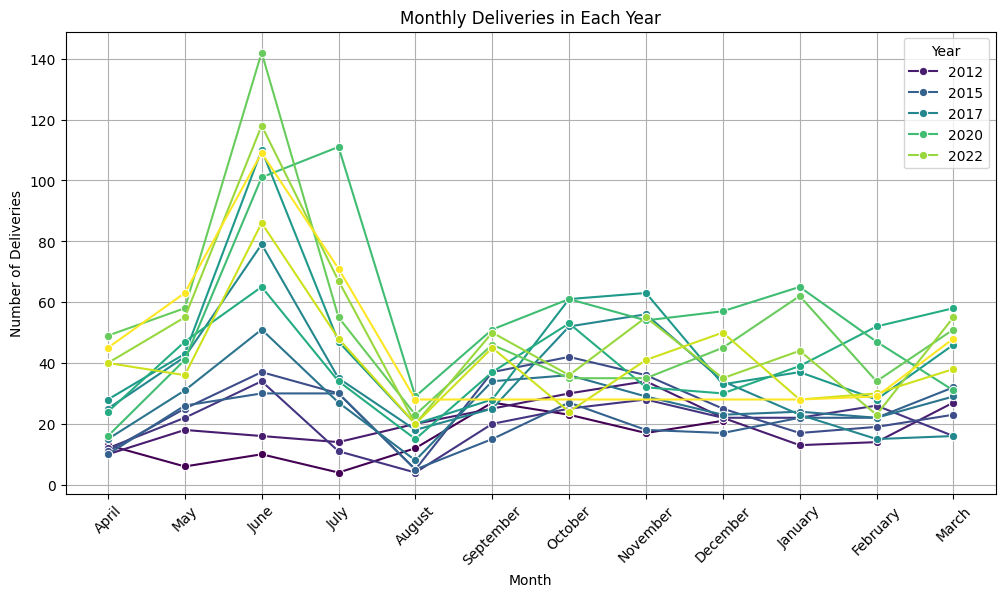

In [8]:
import calendar 
monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker="o", palette="viridis")

plt.xlabel("Month")
plt.ylabel("Number of Deliveries")
plt.title("Monthly Deliveries in Each Year")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(True)
plt.show()

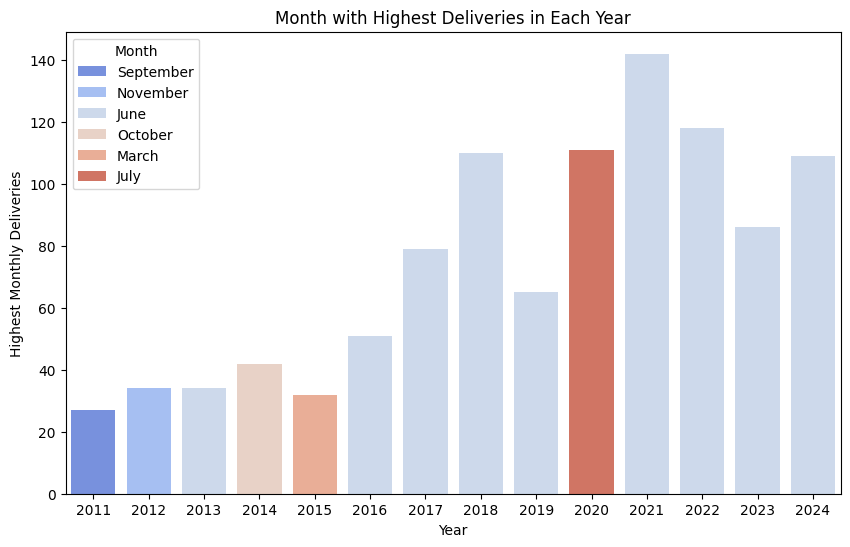

In [9]:

highest_sales_per_year['Month'] = highest_sales_per_year['Month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
sns.barplot(data=highest_sales_per_year, x='Year', y='Sales', hue='Month', palette="coolwarm")

plt.xlabel("Year")
plt.ylabel("Highest Monthly Deliveries")
plt.title("Month with Highest Deliveries in Each Year")
plt.legend(title="Month")
plt.show()

In [10]:
trending_models = df.groupby(['YEAR', 'MODEL']).size().reset_index(name='Sales')

trending_models_per_year = trending_models.loc[trending_models.groupby("YEAR")["Sales"].idxmax()]

print(trending_models_per_year)

     YEAR              MODEL  Sales
8    2011            595 SAR     41
17   2012         595 DI NST    120
28   2013         595 DI NST    111
42   2014            595 SAR    190
55   2015         595 DI NST    107
65   2016         595 DI NST    154
79   2017         595 DI NST    249
93   2018        585 DI NST     236
106  2019        585 DI NST     209
134  2020    YUVO 575 DI 4WD    177
156  2021    YUVO 585 DI 4WD    283
174  2022  YUVO TECH + 585DI    248
195  2023  YUVO TECH + 585DI    337
211  2024  YUVO TECH + 585DI    299


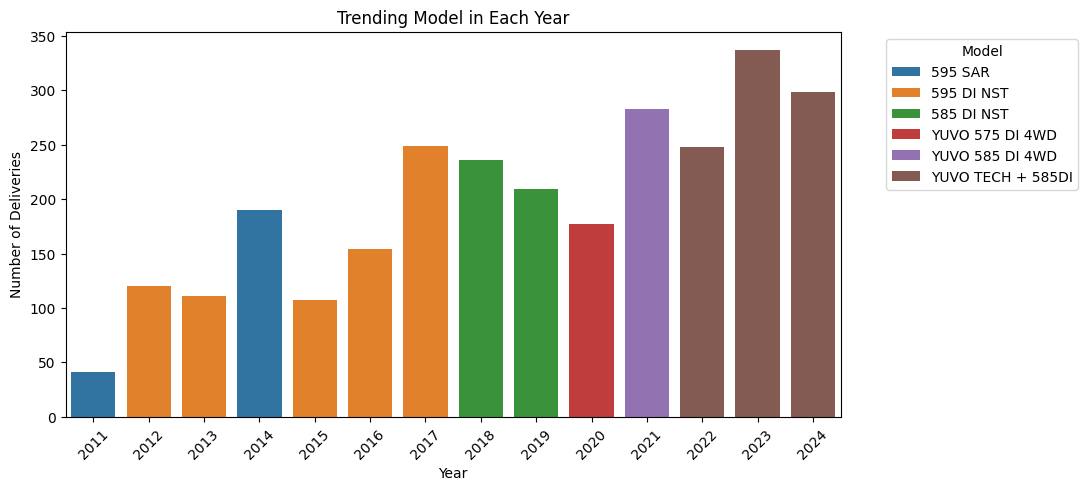

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(data=trending_models_per_year, x='YEAR', y='Sales', hue='MODEL', palette="tab10")

plt.xlabel("Year")
plt.ylabel("Number of Deliveries")
plt.title("Trending Model in Each Year")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [12]:
filtered_df = df[df['TEHSIL'].str.upper() != "UNKNOWN"]
tehsil_sales = filtered_df.groupby(['YEAR', 'TEHSIL']).size().reset_index(name='Sales')

top_tehsil_per_year = tehsil_sales.loc[tehsil_sales.groupby("YEAR")["Sales"].idxmax()]

print(top_tehsil_per_year)

     YEAR       TEHSIL  Sales
24   2011      Keshpur      6
64   2012     Mohanpur     11
100  2013      Keshpur     16
156  2014      Keshpur     17
186  2015   Dantan - I     17
263  2016      Keshpur     18
312  2017  Narayangarh     44
343  2018  Narayangarh     63
375  2019  Narayangarh     47
409  2020  Narayangarh     81
440  2021  Narayangarh     56
450  2022   Dantan - I     48
502  2023  Narayangarh     53
512  2024   Dantan - I     30


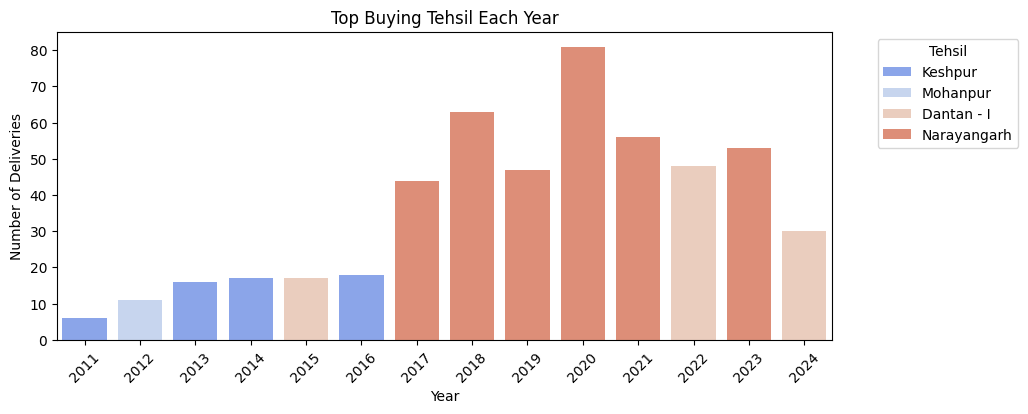

In [13]:
plt.figure(figsize=(10, 4))
sns.barplot(data=top_tehsil_per_year, x='YEAR', y='Sales', hue='TEHSIL', palette="coolwarm")

plt.xlabel("Year")
plt.ylabel("Number of Deliveries")
plt.title("Top Buying Tehsil Each Year")
plt.legend(title="Tehsil", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [14]:
salesman_performance = df.groupby(['YEAR', 'SALESMAN NAME']).size().reset_index(name='Sales')

best_salesman_per_year = salesman_performance.loc[salesman_performance.groupby("YEAR")["Sales"].idxmax()]

print(best_salesman_per_year)

     YEAR         SALESMAN NAME  Sales
10   2011          SWAGATA BOSE     34
14   2012            RATAN JANA     73
23   2013            RATAN JANA     68
35   2014            RATAN JANA    105
55   2015            RATAN JANA     90
77   2016            RANJIT ROY     40
105  2017          SUBHAS NAYEK     71
125  2018        MONOJIT MAHATA     61
161  2019        MONOJIT MAHATA     56
179  2020        AMIT KUMAR PAL     57
243  2021       SURJAKANTA HATI     53
272  2022  PRANAB KUMAR PRADHAN     34
300  2023      MANISHANKAR JANA     33
327  2024        BABULAL MAHATA     40


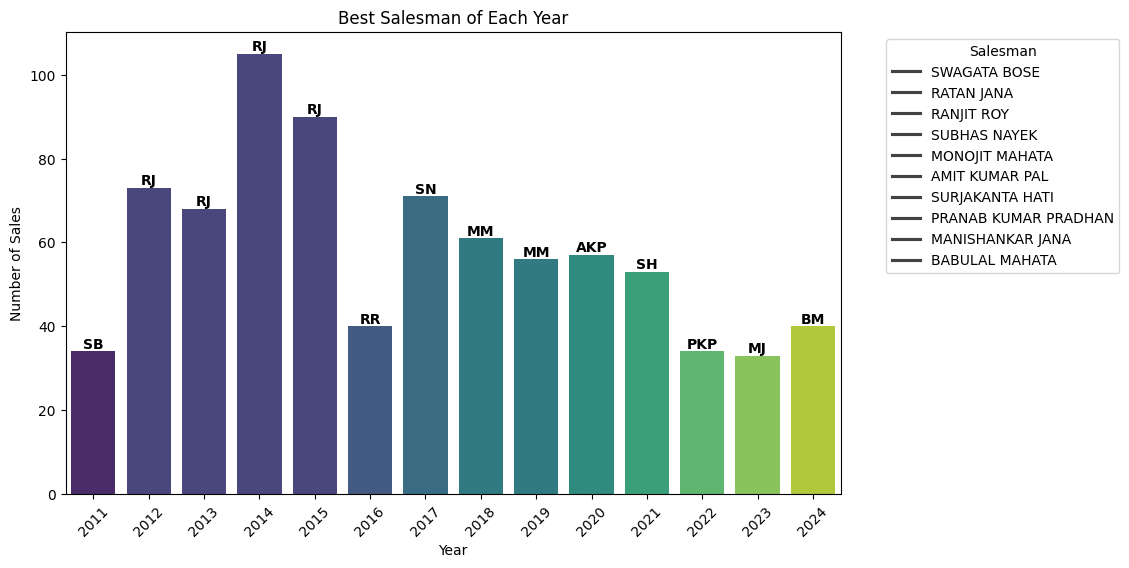

In [15]:
best_salesman_per_year['Salesman_short'] = best_salesman_per_year['SALESMAN NAME'].apply(lambda x: ''.join([name[0] for name in x.split()]))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=best_salesman_per_year, x='YEAR', y='Sales', hue='SALESMAN NAME', palette="viridis")

plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.title("Best Salesman of Each Year")

for p, (year, short_name, sales) in zip(ax.patches, best_salesman_per_year[['YEAR', 'Salesman_short', 'Sales']].values):
    ax.annotate(f"{short_name}", 
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')

plt.legend(title="Salesman", labels=best_salesman_per_year['SALESMAN NAME'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()